In [1]:
%matplotlib notebook

import os
import time
import numpy as np
import matplotlib as mpl

from collections import OrderedDict
from importlib import reload
from matplotlib import pyplot as plt

from labtools import mplplots; reload(mplplots)
from labtools.mplplots.init_nb_plotting import *
from labtools.mplplots import tools as mpltools

import qcodes as qc
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet
from qcodes.sweep import sweep, nest, chain, szip, getter, setter, time_trace
#from qcodes.sweep.sweep import ParameterSweep, Nest, ParameterWrapper, FunctionWrapper, FunctionSweep, getter
from pytopo.qctools import instruments as instools
import utils
from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from scipy import constants
from scipy.interpolate import interp1d
from scipy.optimize import fmin
from scipy.integrate import cumtrapz

In [3]:
from qcodes.dataset.sqlite_base import transaction, one

def get_timestamp(run_id):
    DB = qc.config["core"]["db_location"]
    
    d = DataSet(DB)
    sql = """
    SELECT run_timestamp
    FROM
      runs
    WHERE
      run_id= ?
    """
    c = transaction(d.conn, sql, run_id)
    run_timestamp = one(c, 'run_timestamp')
    return run_timestamp

def timestamp_to_fmt(ts, fmt):
    return time.strftime(fmt, time.gmtime(ts))

def img_basepath(run_id):
    ts = get_timestamp(run_id)
    return timestamp_to_fmt(ts, qc.config['user']['img_dir'] + str(run_id).zfill(4) + '_')

def ds_title(run_id):
    return "{} #{}".format(os.path.abspath(qc.config['core']['db_location']), run_id)

qc.config['user']['img_dir'] = "d:/data/images/%Y-%m/%Y-%m-%d/"
qc.config.save_to_cwd()

In [4]:
from utils.utils import dic_data

In [14]:
from utils.utils.dic_data import dic2hdf5, data
dat = data.init_dic_data('Lucas awesome measurement')
dat['data'] = {'current': s.get_data('current')
dic2hdf5.save_dict_to_hdf5(dat, dat['filepath'])
dic2hdf5.load_dict_from_hdf5

In [5]:
from qcodes.instrument_drivers.stanford_research.SR860 import SR860
sr1 = instools.create_inst(SR860, "sr1", "GPIB0::4::INSTR")

from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A
key1 = instools.create_inst(Keysight_34465A, "key1", "TCPIP0::192.168.0.150")
key2 = instools.create_inst(Keysight_34465A, "key2", "TCPIP0::192.168.0.151")
#key3 = instools.create_inst(Keysight_34465A, "key3", "TCPIP0::192.168.0.152")

#from qcodes.instrument_drivers.rohde_schwarz.SGS100A import RohdeSchwarz_SGS100A
#RF = instools.create_inst(RohdeSchwarz_SGS100A, 'RF', address="TCPIP0::169.254.251.130")

from qcodes.instrument_drivers.yokogawa.GS200 import GS200
yoko1 = instools.create_inst(GS200, 'yoko1', address="USB0::0x0B21::0x0039::91TC01026::INSTR")
yoko2 = instools.create_inst(GS200, "yoko2", "GPIB0::2::INSTR")

yoko1.on()
yoko2.on()




station = qc.Station(yoko1, yoko2, key2, sr1) #, ami)



Connected to: Stanford_Research_Systems SR860 (serial:003223, firmware:V1.47) in 0.25s
Connected to: Keysight Technologies 34465A (serial:MY57505052, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.16s
Connected to: Keysight Technologies 34465A (serial:MY57505146, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.12s
Connected to: YOKOGAWA GS210 (serial:91TC01026, firmware:2.02) in 0.02s
Connected to: YOKOGAWA GS210 (serial:91T926460, firmware:2.02) in 0.02s


Snapshot: Could not update parameter:current_range
Snapshot: Could not update parameter:current
Snapshot: Could not update parameter:current_range
Snapshot: Could not update parameter:current


In [48]:
import sys 
sys.path.append(r"D:\Code\StationQ\MDAC\Driver")
from MDAC import MDAC 

In [49]:
mdac = MDAC('MDAC1', 'ASRL5::INSTR', debug = True)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\ctwrapper\functions.py:1649: VisaIOWarning: VI_WARN_NSUP_ATTR_STATE (1073676420): Although the specified state of the attribute is valid, it is not supported by this implementation.
  return library.viSetAttribute(session, attribute, attribute_state)


## --> PE0
## <-- [OK]
## --> PV0
## <-- [OK]
## --> PLE0
## <-- [OK]
## --> ?V
## <-- MASTER,2,1.4,Apr 23 2018 22:24:06,FALSE,RELEASE
## <-- [OK]
## --> ?
## <-- MASTER,2,1.4,Apr 23 2018 22:24:06,FALSE,RELEASE
## <-- DACs: 20000.00000:1048576:52.42880:4294967295:214748.35938:1:1:0:0
## <-- 1,0.000000000e+00,0x7FFFF,FALSE,TRUE,FALSE,FALSE,FALSE, 
## <-- NONE,0.0000(0),-5.000000(0x00000),0.000000e+00(0x00000),INF,0.0000(0)
## <-- 168 MHz, 0x32353532353551040028003E
## <-- 37.81
## <-- 37.41
## <-- DACs: 20000.00000:1048576:52.42880:4294967295:214748.35938:1:1:0:0
## <-- [OK]
## --> ?
## <-- MASTER,2,1.4,Apr 23 2018 22:24:06,FALSE,RELEASE
## <-- DACs: 20000.00000:1048576:52.42880:4294967295:214748.35938:1:1:0:0
## <-- 1,0.000000000e+00,0x7FFFF,FALSE,TRUE,FALSE,FALSE,FALSE, 
## <-- NONE,0.0000(0),-5.000000(0x00000),0.000000e+00(0x00000),INF,0.0000(0)
## <-- 168 MHz, 0x32353532353551040028003E
## <-- 37.81
## <-- 37.41
## <-- DACs: 20000.00000:1048576:52.42880:4294967295:214748.35938:1:1:0

## --> DAC:31:CALIBRATION ?
## <-- 2:
## <-- 0x00000,-5.096929640e+00
## <-- 0x7FFFF,0.000000000e+00
## <-- 0xFFFFF,5.096959700e+00
## <-- 1.000000e+00,1.000443e-02,1000,10
## <-- [OK]
## --> DAC:31:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:32:CALIBRATION ?
## <-- 1:
## <-- 0x00000,-5.096937370e+00
## <-- 0x7FFFF,0.000000000e+00
## <-- 0xFFFFF,5.096964860e+00
## <-- 1.000000e+00,9.995861e-03,1000,10
## <-- [OK]
## --> DAC:32:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:33:CALIBRATION ?
## <-- 8:
## <-- 0x00000,-5.130057970e+00
## <-- 0x7FFF7,0.000000000e+00
## <-- 0xFFFFF,5.130259410e+00
## <-- 1.000000e+00,9.971284e-03,1000,10
## <-- [OK]
## --> DAC:33:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:34:CALIBRATION ?
## <-- 7:
## <-- 0x00000,-5.130099940e+00
## <-- 0x7FFFC,0.000000000e+00
## <-- 0xFFFFF,5.130199210e+00
## <-- 1.000000e+00,9.970322e-03,1000,10
## <-- [OK]
## --> DAC:34:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:35:CALIBRATION ?
## <-- 6:
## <-- 0x00000

In [62]:
gate_ramp_stepsize = 10e-3  #[V]
gate_ramp_delay = 2/(5/gate_ramp_stepsize)  #[s]

def ramp(param, target, step_size, delay): 
    current_value = param()
    step_size *= np.sign(target - current_value)
    if abs(step_size) < 1E-10: 
        return 
    
    steps = np.arange(current_value, target, step_size)
    for step in steps: 
        param(step)
        time.sleep(delay)
    
    param(target)
    
def set_mdac_in_safemode(nchan=64):

        for ch in mdac.channels[:nchan]:
            ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

        # Note: we do this in separate loops because we want to be sure that
        # no currents are running anywhere before switching the relays
        for ch in mdac.channels[:nchan]:
            ch.dac_output('open')
            ch.bus('open')
            ch.gnd('open')
            ch.smc('open')
            ch.microd('open')
            ch.divider('off')    

In [63]:
set_mdac_in_safemode()

## --> DAC:1:OUTPUT ?
## <-- 0.000000e+00,0x7FFFC
## <-- [OK]
## --> DAC:2:OUTPUT ?
## <-- 0.000000e+00,0x7FFF7
## <-- [OK]
## --> DAC:3:OUTPUT ?
## <-- 0.000000e+00,0x7FFF1
## <-- [OK]
## --> DAC:4:OUTPUT ?
## <-- 0.000000e+00,0x7FFFE
## <-- [OK]
## --> DAC:5:OUTPUT ?
## <-- 0.000000e+00,0x7FFF4
## <-- [OK]
## --> DAC:6:OUTPUT ?
## <-- 0.000000e+00,0x7FFF8
## <-- [OK]
## --> DAC:7:OUTPUT ?
## <-- 0.000000e+00,0x7FFFB
## <-- [OK]
## --> DAC:8:OUTPUT ?
## <-- 0.000000e+00,0x7FFFA
## <-- [OK]
## --> DAC:9:OUTPUT ?
## <-- 0.000000e+00,0x7FFC8
## <-- [OK]
## --> DAC:10:OUTPUT ?
## <-- 0.000000e+00,0x7FFC2
## <-- [OK]
## --> DAC:11:OUTPUT ?
## <-- 0.000000e+00,0x7FFC2
## <-- [OK]
## --> DAC:12:OUTPUT ?
## <-- 0.000000e+00,0x7FFC3
## <-- [OK]
## --> DAC:13:OUTPUT ?
## <-- 0.000000e+00,0x7FFC2
## <-- [OK]
## --> DAC:14:OUTPUT ?
## <-- 0.000000e+00,0x7FFBE
## <-- [OK]
## --> DAC:15:OUTPUT ?
## <-- 0.000000e+00,0x7FFC0
## <-- [OK]
## --> DAC:16:OUTPUT ?
## <-- 0.000000e+00,0x7FFC7
## <-- [OK]
#

## <-- 0
## <-- [OK]
## --> DAC:15:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:15:RELAYS:BUS 0
## <-- [OK]
## --> DAC:15:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:15:RELAYS:SMC 0
## <-- [OK]
## --> DAC:15:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:15:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:15:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:16:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:16:RELAYS:BUS 0
## <-- [OK]
## --> DAC:16:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:16:RELAYS:SMC 0
## <-- [OK]
## --> DAC:16:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:16:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:16:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:17:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:17:RELAYS:BUS 0
## <-- [OK]
## --> DAC:17:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:17:RELAYS:SMC 0
## <-- [OK]
## --> DAC:17:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:17:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:17:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:18:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:18:RELAYS:

## --> DAC:42:RELAYS:BUS 0
## <-- [OK]
## --> DAC:42:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:42:RELAYS:SMC 0
## <-- [OK]
## --> DAC:42:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:42:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:42:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:43:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:43:RELAYS:BUS 0
## <-- [OK]
## --> DAC:43:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:43:RELAYS:SMC 0
## <-- [OK]
## --> DAC:43:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:43:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:43:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:44:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:44:RELAYS:BUS 0
## <-- [OK]
## --> DAC:44:RELAYS:TERMINATE 0
## <-- [OK]
## --> DAC:44:RELAYS:SMC 0
## <-- [OK]
## --> DAC:44:RELAYS:MAIN 0
## <-- [OK]
## --> DAC:44:RELAYS:DIVIDER 0
## <-- [OK]
## --> DAC:44:RELAYS:DIVIDER ?
## <-- 0
## <-- [OK]
## --> DAC:45:RELAYS:DAC_OUTPUT 0
## <-- [OK]
## --> DAC:45:RELAYS:BUS 0
## <-- [OK]
## --> DAC:45:RELAYS:TERMINATE 0
## <-- [OK]
## -

In [ ]:
np.arange(0.0, 0, 0.0)

In [10]:
ami_z.field(0)
ami_x.field(0)
ami_y.field(0)

In [24]:
1/((20e-6/1.05e-9-15e3)/12903)

3.187800000000001

In [23]:
1/0.31

3.2258064516129035

In [15]:
ami_z.field()

5.9999965

In [2]:
from qcodes.instrument_drivers.american_magnetics.AMI430 import AMI430,AMI430_3D
ami_x = instools.create_inst(AMI430, "AMI430_x", "192.168.0.157", port = 7180, has_current_rating=True)
ami_y = instools.create_inst(AMI430, "AMI430_y", "192.168.0.158", port = 7180, has_current_rating=True)
ami_z = instools.create_inst(AMI430, "AMI430_z", "192.168.0.159", port = 7180, has_current_rating=True)

ramp_limit_multiplier = 0.6
ami_x.current_ramp_limit(0.1802*ramp_limit_multiplier)
ami_x.coil_constant(0.01466)
ami_x.current_rating(68.21)

ami_y.current_ramp_limit(0.1784*ramp_limit_multiplier)
ami_y.coil_constant(0.01464)
ami_y.current_rating(68.31)

ami_z.current_ramp_limit(0.0775*ramp_limit_multiplier)
ami_z.coil_constant(0.0818)
ami_z.current_rating(73.35)

ami = instools.create_inst(AMI430_3D, "AMI430", ami_x, ami_y, ami_z, 2)


Connected to: AMERICAN MAGNETICS INC. 430 (serial:170074, firmware:2.55) in 0.98s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:170075, firmware:2.55) in 0.97s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:170076, firmware:2.55) in 0.79s


D:\Code\Qcodes\qcodes\instrument_drivers\american_magnetics\AMI430.py:405: AMI430Warning: Increasing maximum ramp rate: we have a default current ramp rate limit of 0.06 A/s. We do not want to ramp faster than a set maximum so as to avoid quenching the magnet. A value of 0.06 A/s seems like a safe, conservative value for any magnet. Change this value at your own responsibility after consulting the specs of your particular magnet
  warn(warning_message, category=AMI430Warning)


## Test measurements
Setup1: yokogawa biasing a 1M resistor, read out with DL pre-amp set to 1E6 gain measured with key3

Setup2: sr1 biasing (AC+DC) 1 16k resistor, read out with DL pre-amp set to 1E6 gain measured with sr1 and key2

In [6]:
yoko1.on()
yoko2.on()

In [7]:
print(ami_x.ramp_rate())
print(ami_y.ramp_rate_units())
print(ami_z.ramp_rate_units())

0.001
seconds
seconds


In [10]:
ami_x.ramp_rate()

0.001

In [16]:
yoko2_voltage(0)
yoko1_voltage(0)

{'yoko1_voltage': 0}

In [39]:
@getter([('raw_voltage', 'V'), ('current', 'A')])
def measure_dc_only(gain=1e6):
    time.sleep(0.02 * key3.NPLC()) 
    key3_raw = key3.volt()
    current = -key3_raw/gain
    result = key3_raw, current
    return result
#
@getter([('current_2', 'A'), ('raw_voltage_dc_2', 'V'), ('conductance', '2e^2/h'), ('L1X', 'V'), ('L1Y', 'V')])
def measure_acdc(gain=1e6, Rseries=15e3):
    #time.sleep(.1 * key2.NPLC())
    time.sleep(0.5)
    key2_raw = key2.volt()
    #key1_raw = key1.volt()
    #current_dc_1 = -key1_raw/gain
    current_dc = -key2_raw/gain
    L1X     = sr1.X()
    L1Y     = sr1.Y()
    current_ac = L1X/gain
    Vac     = sr1.amplitude()*np.sqrt(2) #SR860 amplitude is really amplitude, not rms voltage in contrast to SR830
    g       = 12906/(Vac/current_ac - Rseries) #[2e^2/h]
    result  = current_dc, key2_raw, g, L1X, L1Y
    return result

In [37]:
@setter([("yoko1_voltage", "V")])
def yoko1_voltage(voltage): 
    yoko1.ramp_voltage(voltage, 1/200, 0.02)

@setter([("yoko2_voltage", "V")])
def yoko2_voltage(voltage): 
    yoko2.ramp_voltage(voltage, 1/200, 0.02)

In [23]:
ami_x.field()

-0.4000029

<IPython.core.display.Javascript object>


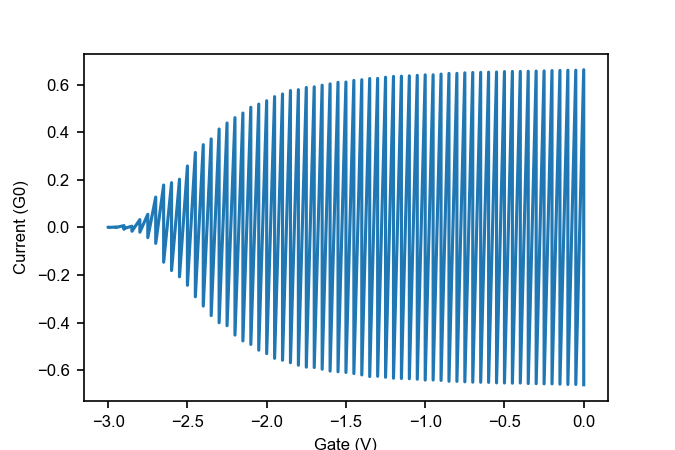

Starting experimental run with id: 204


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


Completed measurement. Database path: Q100B_QPC_0deg80nm_S3/3


In [47]:
#setup = [(lambda: None, tuple())]
#cleanup = [(lambda: None, tuple())]

def setup():
    key1.NPLC(1)
    key2.NPLC(1)

    #g_bias = 1e-3
    #sr1.amplitude(2.5*1e-6/(np.sqrt(2)*1e-2*g_bias))
    sr1.amplitude(1e-5)     #bias AC voltage
    #sr1.frequency(83.13)
    #sr1.phase(168.5)
    sr1.sine_outdc(1e-3)  #bias DC voltage
    yoko1_voltage(0)         #gate voltage
    yoko2_voltage(0) 
    sr1.time_constant(.1)
    #ami_x.field(0)
    #ami_y.field(0)

def cleanup(): 
    #pass
    yoko1_voltage(0)
    yoko2_voltage(0)
    #ami_x.field(0)
    #ami_z.field(0)
    
result = do_experiment(
#     "NIS-Thermometer/SIM_10k",
    "Q100B_QPC_0deg80nm_S3",
    [(setup, ())],
    nest(       
        #sweep(ami_x.field, np.linspace(-0.4, 0.4, 801)),
        #sweep(sr1.frequency, np.linspace(80,130,41)),
        sweep(yoko2_voltage, np.linspace(0, -3, 61)),
        #sweep(yoko2_voltage, np.linspace(0, -10, 11)),
        sweep(sr1.sine_outdc, np.linspace(10e-3, -10e-3, 21)),
                
        measure_acdc
    ),
    [(cleanup, ())],
    return_format=["data_set_path", "dataset"], 
    live_plot_axes=[{"Gate (V)": 0, "Current (G0)": 3}]
)

In [41]:
from utils.utils.dic_data import dic2hdf5, data
dat = data.init_dic_data('Q100B_QPC_0deg80nm_S3') #device name
#dat['data'] = {'gate1': np.array(result[1].get_data('yoko1_voltage')), 'gate2': np.array(result[1].get_data('yoko2_voltage')), 'current': np.array(result[1].get_data('current')), 'current_lockin':np.array(result[1].get_data('L1X'))}
dat['data'] = dict(zip(result[1].parameters.split(","), np.array([result[1].get_values(result[1].parameters.split(",")[i]) for i in range(len(result[1].parameters.split(",")))])))
dic2hdf5.save_dict_to_hdf5(dat, dat['filepath'])

In [39]:
time_trace?

### Save data as hdf5

In [10]:
from utils.utils.dic_data import dic2hdf5, data
dat = data.init_dic_data('WAL_0deg_80nm') #device name
#dat['data'] = {'gate1': np.array(result[1].get_data('yoko1_voltage')), 'gate2': np.array(result[1].get_data('yoko2_voltage')), 'current': np.array(result[1].get_data('current')), 'current_lockin':np.array(result[1].get_data('L1X'))}
dat['data'] = dict(zip(result[1].parameters.split(","), np.array([result[1].get_values(result[1].parameters.split(",")[i]) for i in range(len(result[1].parameters.split(",")))])))
dic2hdf5.save_dict_to_hdf5(dat, dat['filepath'])


### Load hdf5 data

In [160]:
reload(dic2hdf5)

<module 'utils.utils.dic_data.dic2hdf5' from 'D:\\Code\\utils\\utils\\dic_data\\dic2hdf5.py'>

In [42]:
dat1 = dic2hdf5.load_dict_from_hdf5('D:\\data\\20180507\\20180507_004.hdf5')

In [31]:
result[1].parameters

'AMI430_x_field,current,raw_voltage_dc,conductance,L1X,L1Y'

In [28]:
dat1['data']

{'AMI430_x_field': array([[ 0.02 ],
        [ 0.019],
        [ 0.018],
        [ 0.017],
        [ 0.016],
        [ 0.015],
        [ 0.014],
        [ 0.013],
        [ 0.012],
        [ 0.011],
        [ 0.01 ],
        [ 0.009],
        [ 0.008],
        [ 0.007],
        [ 0.006],
        [ 0.005],
        [ 0.004],
        [ 0.003],
        [ 0.002],
        [ 0.001],
        [ 0.   ],
        [-0.001],
        [-0.002],
        [-0.003],
        [-0.004],
        [-0.005],
        [-0.006],
        [-0.007],
        [-0.008],
        [-0.009],
        [-0.01 ],
        [-0.011],
        [-0.012],
        [-0.013],
        [-0.014],
        [-0.015],
        [-0.016],
        [-0.017],
        [-0.018],
        [-0.019],
        [-0.02 ]]), 'L1X': array([[0.00028026],
        [0.00028057],
        [0.0002779 ],
        [0.00027776],
        [0.00028137],
        [0.00027986],
        [0.00027846],
        [0.00028133],
        [0.00028116],
        [0.00027982],
        [0.00027

### 1D plot

In [34]:
def plot1D(data, x, y):
    plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    plt.plot(data[x], data[y])
    plt.xlabel(x+' (V)')
    plt.ylabel(y+' (G0)')

<IPython.core.display.Javascript object>


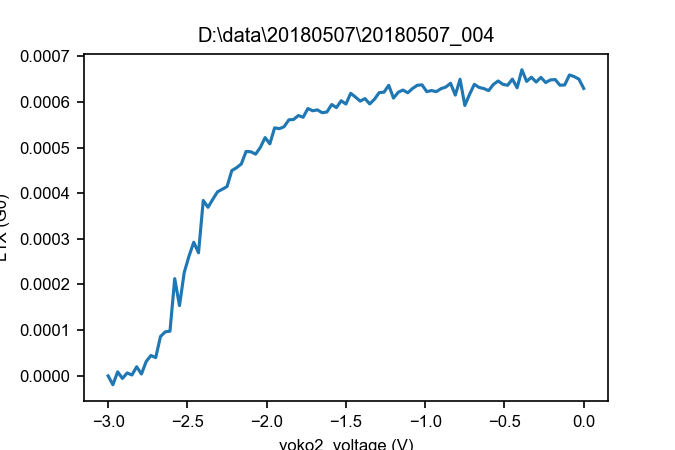

In [46]:
#AMI430_x_field yoko2_voltage sr1_sine_outdc
plot1D(dat1, 'yoko2_voltage', 'L1X')

In [52]:
result[1].parameters

'sr1_sine_outdc,current_1,current_2,raw_voltage_dc_1,raw_voltage_dc_2'

### 1D plot from 2D scans

In [74]:
fr = np.unique(dat1['data']['sr1_frequency'])

In [161]:
def plot1D_from_2D(data, x, y, x2, x2_value):
    plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    points = data[x2] == x2_value
    plt.plot(data[x][points], data[y][points], label=x2+' = '+str(x2_value))
    plt.xlabel(x+' (B)')
    plt.ylabel(y+' (A)')
    plt.legend()

<IPython.core.display.Javascript object>


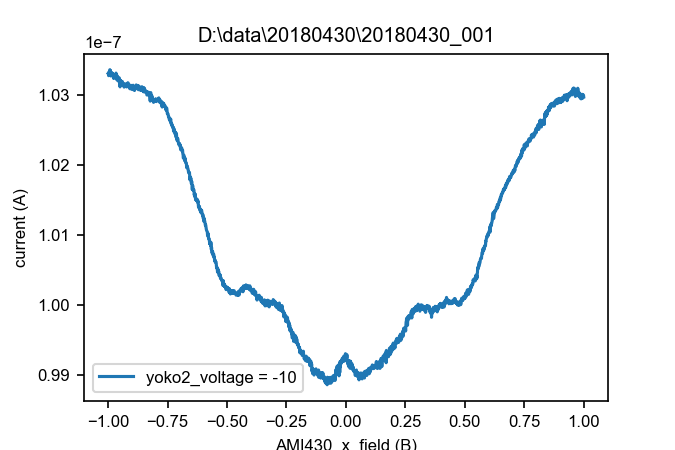

In [166]:
plot1D_from_2D(dat1, 'AMI430_x_field', 'current', 'yoko2_voltage', -10) #for a in np.linspace(0,-10,11)]
#print(fr[20])

In [304]:
#plt.figure('1D')
#plt.plot(dat['data']['yoko1_voltage'][dat['data']['yoko2_voltage'] == 0],dat['data']['current'][dat['data']['yoko2_voltage'] == 0])

### 2D plots

In [24]:
len(np.unique(dat1['data']['sr1_frequency']))

63

In [42]:
def colorplot(data, fast_s, slow_s, z):
    fig=plt.figure(data['name'])
    plt.title(data['filepath'])
    data = data['data']
    cmap = plt.cm.viridis
    norm = mpl.colors.Normalize(vmin=min(data[z]), vmax=max(data[z]))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel(z)
    plt.contourf(np.unique(data[fast_s])[::-1], np.unique(data[slow_s])[::-1], np.reshape(data[z],(len(np.unique(data[slow_s])),len(np.unique(data[fast_s])))),50)
    plt.xlabel(fast_s)
    plt.ylabel(slow_s)

<IPython.core.display.Javascript object>


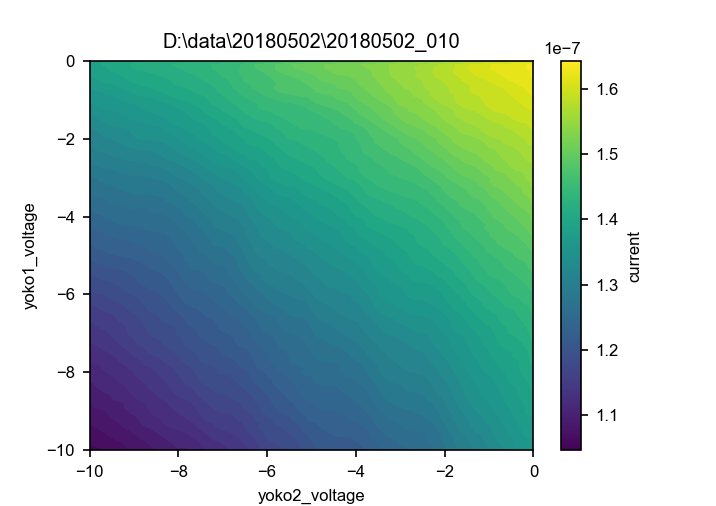

In [43]:
colorplot(dat1, 'yoko2_voltage', 'yoko1_voltage', 'current')

In [305]:
#fig=plt.figure('test2')
#cmap = plt.cm.viridis
#norm = mpl.colors.Normalize(vmin=min(dat1['data']['current']), vmax=max(dat1['data']['current']))
#sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
#sm.set_array([])
#fig.colorbar(sm)
#plt.contourf(np.unique(dat1['data']['yoko1_voltage'])[::-1], np.unique(dat1['data']['yoko2_voltage'])[::-1], np.reshape(dat1['data']['current'],(101,101)),10)


In [70]:
plt.figure('test')
plt.plot(result[1].get_data('yoko_voltage'), result[1].get_data('raw_voltage_dc'))

In [47]:
dat = data.init_dic_data('Lucas awesome measurement')


In [50]:
dat['data']={}
dat['data'].keys 

dict_keys([])

In [ ]:
dat['data'] = {'current': s.get_data('current')
dic2hdf5.save_dict_to_hdf5(dat, dat['filepath'])

In [46]:
s = result[1]
s.get_parameters()

[yoko_voltage (numeric),
 current (numeric),
 raw_voltage_dc (numeric),
 conductance (numeric),
 L1X (numeric),
 L1Y (numeric)]

In [ ]:
s.get_values('current')

## Now pull the data back out of the dataset database to plot whichever column you want

In [ ]:
path, ds = result
dv = get_results_from_db_path(path)
dataid = ds.run_id

In [ ]:
v = np.array(dv.get_values('yoko_voltage'))[:,0]
i = np.array(dv.get_values('current'))[:,0]
raw_voltage = np.array(dv.get_values('raw_voltage'))[:,0]

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4, 2))

ax1.plot(v, i, 'o',label="some text")
ax2.plot(v, raw_voltage, 'o', label="some more text")
ax1.legend(loc='upper left', fontsize='x-small')
ax1.set_ylabel('Current (A)')
ax2.set_xlabel('Bias voltage (V)')
ax2.set_ylabel('Raw voltage on key3 (V)')
ax2.legend()


## Now measure differential conductance with the lock-in

In [ ]:
sr1.sine_outdc()

In [ ]:
setup = [(lambda: None, tuple())]
cleanup = [(lambda: None, tuple())]

key2.NPLC(1)

g_bias = 10e-6
sr1.amplitude(g_bias)
sr1.frequency(30.3)
sr1.time_constant(.1)

result = do_experiment(
#     "NIS-Thermometer/SIM_10k",
    "SanityChecks/John20180331",
    setup,
    nest(
#         sweep(lockin1.frequency, np.linspace(1,60,401)),
        sweep(sr1.sine_outdc, np.linspace(0, 10e-3, 101)),
        measure_acdc
    ),
    cleanup,
    return_format=["data_set_path", "dataset"], 
    live_plot_axes=[{"Bias (V)": 0, "dI/dV (2e^2/h)": 3}]
)

In [ ]:
path, ds = result
dv = get_results_from_db_path(path)
dataid = ds.run_id

In [4]:
result

NameError: name 'result' is not defined

In [ ]:
dc_bias = np.array(dv.get_values('sr1_sine_outdc'))[:,0]
dc_current = np.array(dv.get_values('current'))[:,0]
didv = np.array(dv.get_values('conductance'))[:,0]
L1X = np.array(dv.get_values('L1X'))[:,0]
L1Y = np.array(dv.get_values('L1Y'))[:,0]

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(6, 4))

ax1.plot(dc_bias, dc_current ,label="some text")
ax2.plot(dc_bias, didv, label="some more text")
ax1.legend(loc='upper left', fontsize='x-small')
ax1.set_ylabel('Current (A)')
ax2.set_xlabel('Bias voltage (V)')
ax2.set_ylabel('dI/dV (2e^2/h)')
ax2.legend()

In [ ]:
print('dV/dI ~ ' + str(25812*0.56) + ' Ohms')
print('Numerical dV/dI ~ ' + str(0.01/6.2e-7) + ' Ohms')

## Simple RF
Setup RF readout with a homodyne measurement, record in-phase component with key1

In [ ]:
@getter([('voltage', 'V')])
def measure_rf():
    time.sleep(.1 * key1.NPLC()) 
    V_reflect = key1.volt()
    result  = V_reflect
    return result

In [ ]:
setup = [(lambda: None, tuple())]
cleanup = [(lambda: None, tuple())]

key1.NPLC(1)

RF.power(13)

result = do_experiment(
#     "NIS-Thermometer/SIM_10k",
    "SanityChecks/John20180331",
    setup,
    nest(
#         sweep(lockin1.frequency, np.linspace(1,60,401)),
        sweep(RF.frequency, np.linspace(250e6, 300e6, 501)),
        measure_rf
    ),
    cleanup,
    return_format=["data_set_path", "dataset"], 
    live_plot_axes=[{"frequency (Hz)": 0, "I_V (V)": 1}]
)

In [ ]:
path, ds = result
dv = get_results_from_db_path(path)
dataid = ds.run_id

In [ ]:
dv

In [ ]:
frequency = np.array(dv.get_values('RF_frequency'))[:,0]
V_ref = np.array(dv.get_values('voltage'))[:,0]
P_ref = np.log10(V_ref**2)

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(6,5))
ax1.plot(frequency, V_ref ,label="some text")
ax2.plot(frequency, P_ref, label="some more text")
ax1.legend(loc='upper left', fontsize='x-small')
ax1.set_ylabel('Reflected Voltage')
ax2.set_xlabel('RF frequency (Hz)')
ax2.set_ylabel('Reflected power (arb units)')
ax2.legend()

In [ ]:
sr1.sine_outdc()

## Add some safeties for ramping voltages

In [ ]:
#Ramp at a well-defined rate for bias from the SR860 lockin
def biasramp(Vset):
    delay = 0.02 # [s]
    Vstep = 100e-6 #[V]
    
    Vstart = sr1.sine_outdc()    
    voltage = np.linspace(Vstart,Vset,int(abs(Vstart-Vset)/Vstep))    
    for i in range(len(voltage)):
        sr1.sine_outdc(voltage[i])
        time.sleep(delay)

In [ ]:
t0 = time.time()
biasramp(0.0)
t1 = time.time()
print('Time to ramp: ' + str(t1 - t0) + 's')

In [9]:
#Ramp at a well defined rate with Yokogawa voltage source
Vset = 0.1
step = 100e-6
delay = 0.02
t0 = time.time()
yoko1.ramp_voltage(Vset, step, delay)
t1 = time.time()
print('Time to ramp: ' + str(t1 - t0) + 's')

Time to ramp: 31.205859899520874s


In [8]:
yoko1.ramp_voltage?